# PCA

PCA stands for **Principal Component Analysis**. 

It is a statistical technique used to reduce the dimensionality of a dataset while **retaining as much of the variation in the dataset as possible**. 

PCA works by identifying the principal components of the dataset, which are the directions in which the data varies the most. It then projects the data onto these principal components, creating a new set of variables that capture the most important information in the original dataset. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# style ggplot
plt.style.use('ggplot')
np.random.seed(100)

In [2]:
def generate_linearly_dependent_data(num_samples, slope=1.0, intercept=0.0, noise_level=0.1):
  """Generates sample data x and y that are linearly dependent.

  Args:
    num_samples: The number of samples to generate.
    slope: The slope of the linear relationship between x and y.
    intercept: The intercept of the linear relationship between x and y.
    noise_level: The amount of noise to add to the data.

  Returns:
    A tuple of numpy arrays containing the generated data x and y.
  """

  # Generate random x values. between 0 and 10.
  x = np.random.rand(num_samples) * 10

  # Generate y values based on the linear relationship between x and y.
  y = slope * x + intercept

  # Add noise to the y values.
  noise = np.random.randn(num_samples) * noise_level
  y += noise

  return x, y

In [3]:
x, y = generate_linearly_dependent_data(num_samples=20, slope=0.4, intercept=0.0, noise_level=0.5)

In [4]:
def plot_data(x, y, x_label='Feature 01', y_label='Feature 02', project_x=True, project_y=True):
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))
  
  ax.axhline(0, alpha=0.5, color='grey')
  ax.axvline(0, alpha=0.5, color='grey')
  ax.axis('equal')

  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

  ax.scatter(x, y, alpha=0.5)
  # both axis should have the same scale
  ax.set(xlim=(-3, 11), ylim=(-3, 11))

  # both axis should have same tick marks
  ax.set_xticks(range(-3, 12))
  ax.set_yticks(range(-3, 12))

  if project_x:
    plt.scatter(x, np.zeros_like(x), alpha=0.5)

  if project_y:
    plt.scatter(np.zeros_like(y), y, alpha=0.5)

  # add text at the top left corner
  plt.text(10.2, 0, 
         f'Feature 1\n Range: {x.min():.2f} - {x.max():.2f}, Variance: {x.var():.2f}\n \nFeature 2\n Range: {y.min():.2f} - {y.max():.2f}, Variance: {y.var():.2f}\n', fontsize=9)

  plt.show()

## Intuition

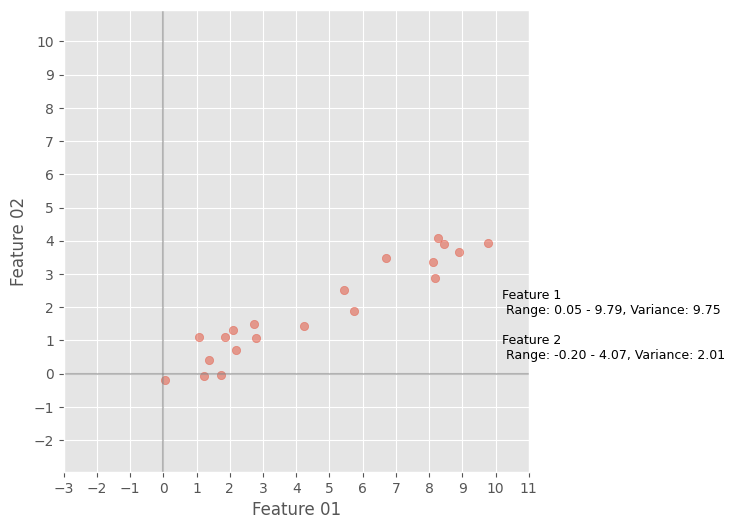

In [5]:
plot_data(x, y, project_x=False, project_y=False)

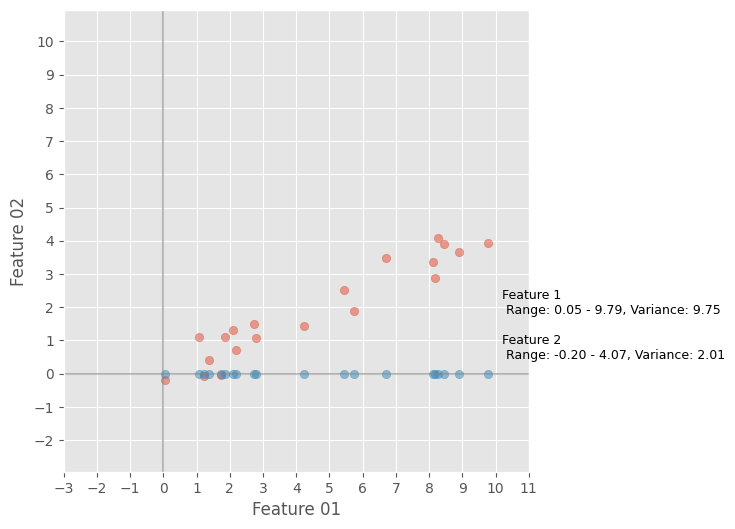

In [6]:
plot_data(x, y, project_x=True, project_y=False)

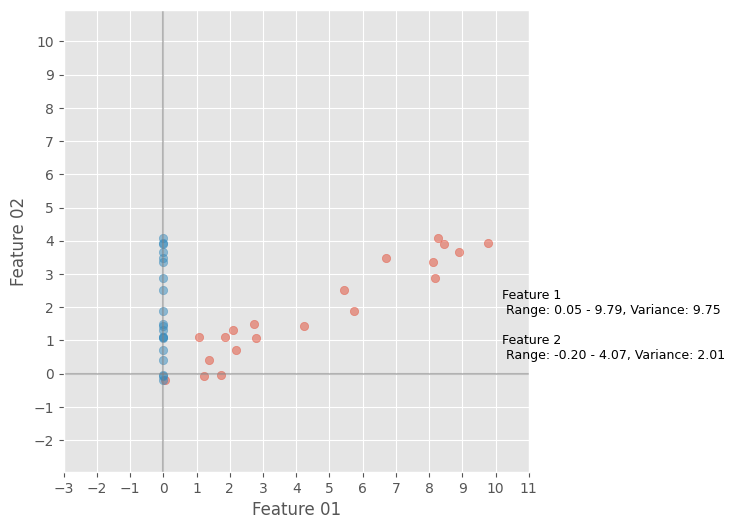

In [7]:
plot_data(x, y, project_x=False, project_y=True)

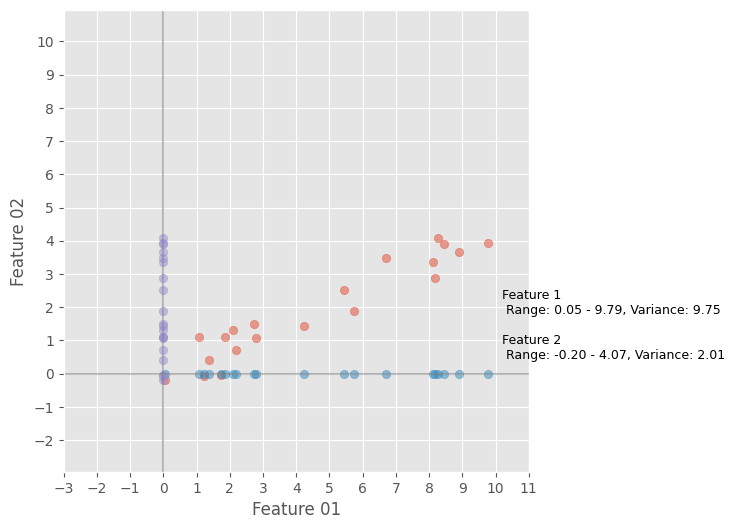

In [8]:
plot_data(x, y, project_x=True, project_y=True)

----

Variance:

$ \text{Variance} = \sum_{i=1}^{n} \frac{(x_i - \mu)^2}{n} $





Where:
- $x_i$ is each individual value in the dataset,
- $\mu$ is the mean (average) of the dataset,
- $n$ is the number of values in the dataset,
- `Σ` denotes the sum of the values.

This formula calculates the average of the squared differences from the mean. 

It's a measure of how spread out the numbers in the data set are. 

If the variance is small, it means that the numbers are close to the mean and to each other. 

If the variance is large, it means that the numbers are spread out far from the mean and from each other.

Variance is important in Principal Component Analysis (PCA) because PCA aims to find the directions (principal components) where the data varies the most. 

PCA tries to find the directions of maximum variance in high-dimensional data and projects it onto a smaller dimensional subspace while retaining most of the data's original information.

The first principal component accounts for the largest possible variance in the dataset. 

Each succeeding component accounts for the highest possible remaining variance under the constraint that it is orthogonal to the preceding components. 

----

## Practical Example

In [9]:
# load mnist dataset from sklearn
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


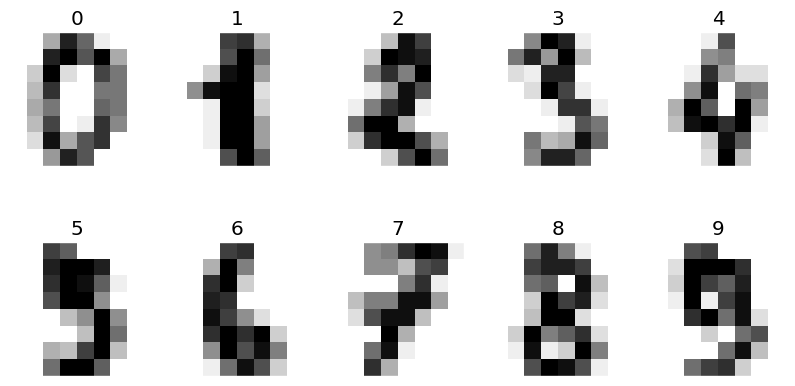

In [10]:
# print(digits.DESCR)

# plot 10 digits
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='binary')
  axi.set(xticks=[], yticks=[])
  axi.set_title(digits.target[i])

In [11]:
# convert to pandas dataframe
import pandas as pd
df = pd.DataFrame(digits.data)
df['target'] = digits.target

# print sample data
df.sample(5)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
883,0.0,0.0,1.0,8.0,10.0,8.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8.0,8.0,1.0,0.0,0.0,1
1759,0.0,0.0,7.0,16.0,9.0,8.0,2.0,0.0,0.0,5.0,...,0.0,0.0,0.0,7.0,15.0,14.0,7.0,0.0,0.0,9
204,0.0,4.0,16.0,16.0,16.0,16.0,5.0,0.0,0.0,11.0,...,0.0,0.0,4.0,16.0,12.0,1.0,0.0,0.0,0.0,5
1730,0.0,1.0,9.0,16.0,16.0,12.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,11.0,4.0,0.0,0.0,3
27,0.0,0.0,0.0,8.0,14.0,14.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,13.0,1.0,0.0,0.0,7


In [12]:
# split df into X and y
X = df.drop('target', axis=1)
y = df['target']

In [14]:
# perform Knn classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

def knn_classification(X_train, y_train, X_test, y_test, n_neighbors=5):   
    # Create the classifier.
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier on the training data.
    knn.fit(X_train, y_train)
    
    # Compute the accuracy on the test set.
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    
    return accuracy


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# print shapes of X_train and X_train_pca with formatting
print(f'X_train shape: {X_train.shape}')
print(f'X_train_pca shape: {X_train_pca.shape}')



X_train shape: (1437, 64)
X_train_pca shape: (1437, 15)


In [15]:
# print accuracy
print(f'Accuracy without PCA: {knn_classification(X_train, y_train, X_test, y_test):.3f}')
print(f'Accuracy with PCA: {knn_classification(X_train_pca, y_train, X_test_pca, y_test):.3f}')

Accuracy without PCA: 0.986
Accuracy with PCA: 0.986


In [16]:
# for loop to find the best n_components
for n_components in range(1, 33):
  pca = PCA(n_components=n_components)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  print(f'Accuracy with {n_components} components: {knn_classification(X_train_pca, y_train, X_test_pca, y_test):.3f}')

Accuracy with 1 components: 0.297
Accuracy with 2 components: 0.622
Accuracy with 3 components: 0.764
Accuracy with 4 components: 0.886
Accuracy with 5 components: 0.939
Accuracy with 6 components: 0.939
Accuracy with 7 components: 0.967
Accuracy with 8 components: 0.961
Accuracy with 9 components: 0.975
Accuracy with 10 components: 0.978
Accuracy with 11 components: 0.983
Accuracy with 12 components: 0.978
Accuracy with 13 components: 0.981
Accuracy with 14 components: 0.975
Accuracy with 15 components: 0.986
Accuracy with 16 components: 0.986
Accuracy with 17 components: 0.986
Accuracy with 18 components: 0.986
Accuracy with 19 components: 0.986
Accuracy with 20 components: 0.986
Accuracy with 21 components: 0.986
Accuracy with 22 components: 0.986
Accuracy with 23 components: 0.986
Accuracy with 24 components: 0.986
Accuracy with 25 components: 0.983
Accuracy with 26 components: 0.978
Accuracy with 27 components: 0.981
Accuracy with 28 components: 0.981
Accuracy with 29 components: 

---

# Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [17]:
# Eigenvalues
print(pca.explained_variance_)

[178.31030297 164.8352038  144.87757571 101.53734615  67.85386781
  59.3878914   51.50756549  42.96269595  40.60881878  36.54388332
  28.68463016  27.83279353  22.40115894  21.31839338  17.72855245
  17.06329368  15.73547038  14.95305232  12.29409577  11.17301539
  10.74115486   9.57140812   9.05090416   8.75505071   8.16322886
   7.32268064   7.00823919   6.05832234   5.97498292   5.11540867
   4.55472676   4.20967412]


In [18]:
# Eigen vectors
print(pca.components_.shape)

(32, 64)


In [19]:
# print explained variance ratio
print(pca.explained_variance_ratio_)

[0.14804542 0.13685747 0.12028728 0.08430326 0.05633693 0.04930789
 0.04276511 0.03567057 0.03371622 0.03034123 0.02381594 0.02310869
 0.01859898 0.01769999 0.01471946 0.01416711 0.01306466 0.01241505
 0.0102074  0.0092766  0.00891804 0.00794684 0.00751468 0.00726904
 0.00677767 0.00607979 0.00581872 0.00503003 0.00496084 0.00424716
 0.00378165 0.00349516]


In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14804542, 0.28490289, 0.40519017, 0.48949342, 0.54583035,
       0.59513824, 0.63790335, 0.67357392, 0.70729014, 0.73763137,
       0.76144732, 0.78455601, 0.80315498, 0.82085497, 0.83557443,
       0.84974154, 0.86280621, 0.87522126, 0.88542866, 0.89470526,
       0.9036233 , 0.91157014, 0.91908482, 0.92635386, 0.93313153,
       0.93921132, 0.94503004, 0.95006008, 0.95502092, 0.95926808,
       0.96304973, 0.96654489])

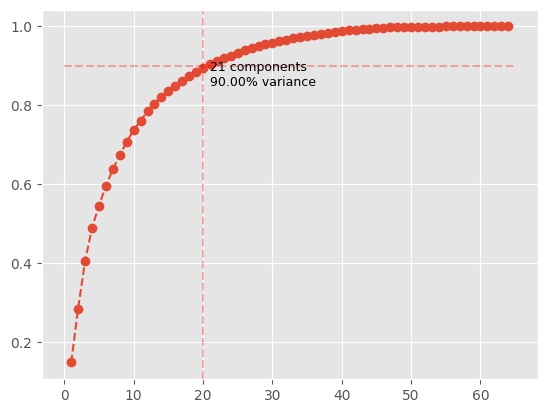

In [21]:
# perform PCA on the dataset and plot the explained variance ratio
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

plt.plot(range(1, 65), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

excepted_percentage = 0.90

# find the elbow point
mark = np.where(pca.explained_variance_ratio_.cumsum() > excepted_percentage)[0][0]

# mark the elbow point and draw a vertical line
plt.axvline(mark, c='red', linestyle='--', alpha=0.3)
# horizontal line
plt.hlines(excepted_percentage, 0, 65, colors='red', linestyles='--', alpha=0.3)

# add text to the elbow point
plt.text(mark+1, excepted_percentage-0.05, f'{mark+1} components \
         \n{excepted_percentage*100:.2f}% variance', fontsize=9)

plt.show()

---

# Visualization

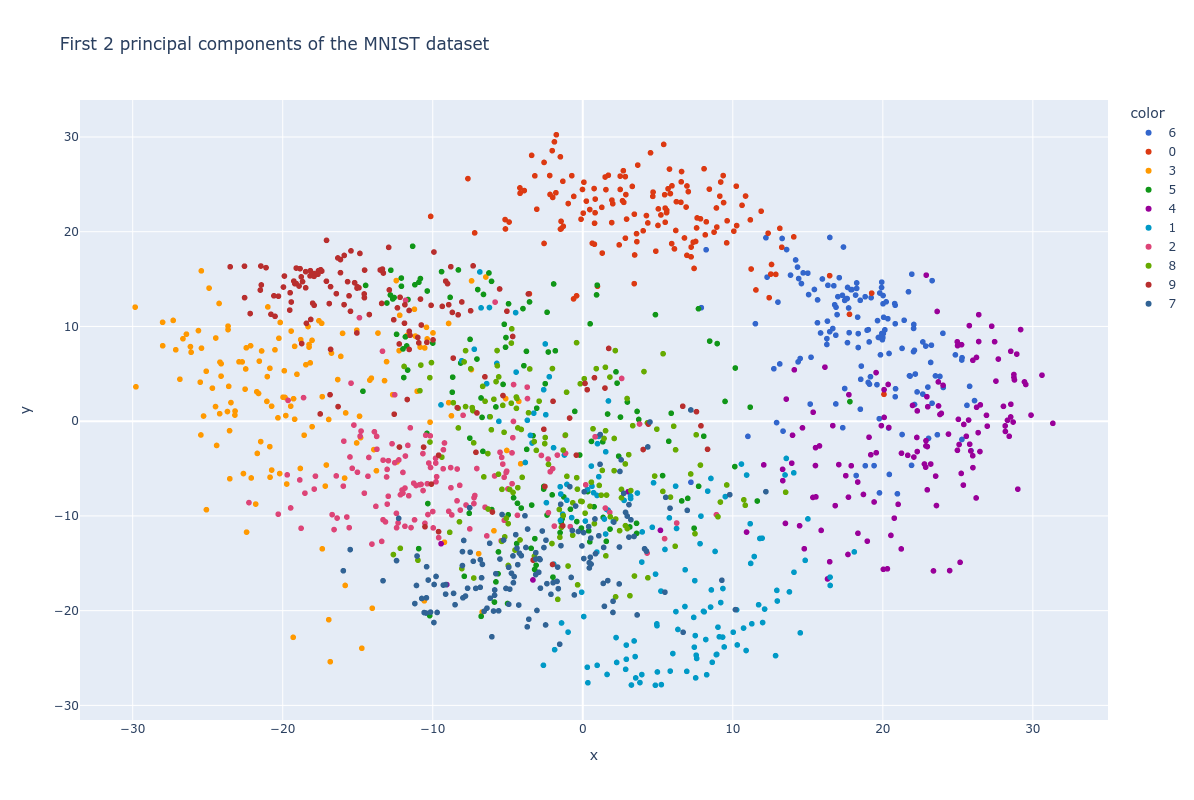

In [25]:
# plot the first 2 principal components using plotly
import plotly.express as px

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
y_train = y_train.astype(str)

fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train,
                    labels={'x': 'PC 1', 'y': 'PC 2'}, 
                    color_discrete_sequence=px.colors.qualitative.G10,
                    title='First 2 principal components of the MNIST dataset')

fig.update_layout(width=800, height=800)
fig.show()

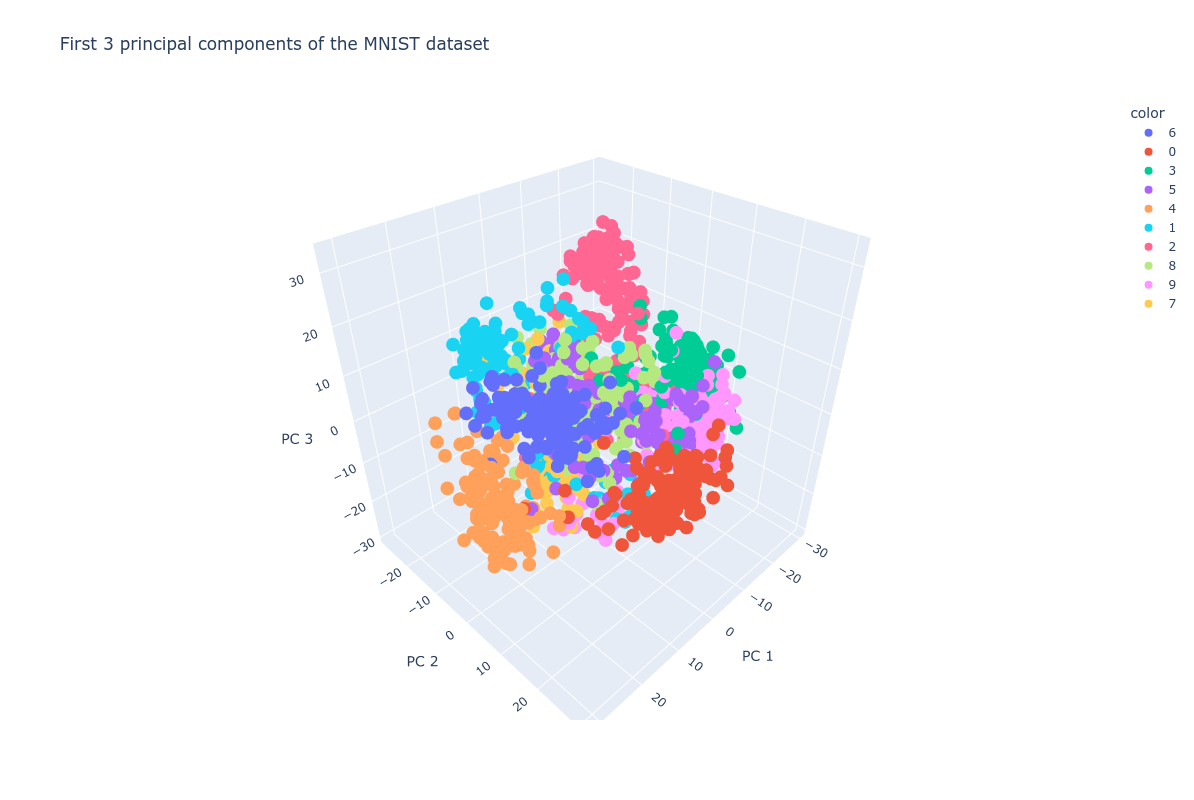

In [23]:
# plot first 3 principal components using plotly
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

fig = px.scatter_3d(x=X_train_pca[:, 0], y=X_train_pca[:, 1], z=X_train_pca[:, 2], color=y_train,
                    labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'}, 
                    title='First 3 principal components of the MNIST dataset')

fig.update_layout(width=800, height=800)
fig.show()